In [51]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [52]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [53]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)


In [54]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)


In [55]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test,
)


Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.3476 - sparse_categorical_accuracy: 0.9051 - val_loss: 0.1888 - val_sparse_categorical_accuracy: 0.9460
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1650 - sparse_categorical_accuracy: 0.9533 - val_loss: 0.1367 - val_sparse_categorical_accuracy: 0.9608
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1191 - sparse_categorical_accuracy: 0.9656 - val_loss: 0.1096 - val_sparse_categorical_accuracy: 0.9684
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0933 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.0952 - val_sparse_categorical_accuracy: 0.9709
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0764 - sparse_categorical_accuracy: 0.9774 - val_loss: 0.0917 - val_sparse_categorical_accuracy: 0.9723
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0634 - sparse_categorica

In [56]:
print(ds_train.cardinality())
print(ds_test.cardinality())
print(len(list(ds_train)))
print(len(list(ds_test)))

tf.Tensor(469, shape=(), dtype=int64)
tf.Tensor(79, shape=(), dtype=int64)
469
79


In [57]:
import pandas as pd
res_df = pd.DataFrame(columns=['No. of neurons(HL1)', 'Activation(HL1)', 'No. of neurons(HL2)', 'Activation(HL2)', 'Accuracy'])

In [58]:
import numpy as np
y_test = np.concatenate([y for x, y in ds_test], axis=0)
x_test = np.concatenate([x for x, y in ds_test], axis=0)

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [60]:
classes = [i for i in range(10)]

Hidden Layer 1: 50 neurons, activation=tanh
Hidden Layer 2: 50 neurons, activation=tanh
Accuracy: 0.9713000059127808
313/313 [==============================] - 1s 2ms/step
Confusion matrix:
[[ 957    0    1    1    0    4   12    2    2    1]
 [   0 1121    1    2    0    1    5    1    4    0]
 [   6    2  993    6    0    0    6    7   11    1]
 [   0    0    9  982    0    9    2    5    2    1]
 [   0    1    6    0  954    1    6    3    0   11]
 [   3    0    0    9    0  869    7    0    2    2]
 [   1    2    3    0    0    6  944    1    1    0]
 [   0    5   10    7    0    2    0  998    2    4]
 [   2    0    6    6    3   12    7    7  928    3]
 [   2    4    0    7   11    5    0    6    7  967]]

Hidden Layer 1: 50 neurons, activation=tanh
Hidden Layer 2: 50 neurons, activation=sigmoid
Accuracy: 0.9718999862670898
313/313 [==============================] - 1s 2ms/step
Confusion matrix:
[[ 964    0    2    1    0    2    7    1    2    1]
 [   0 1128    1    1    0    0 

c:\Users\Sai_Panda\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Hidden Layer 1: 100 neurons, activation=sigmoid
Hidden Layer 2: 50 neurons, activation=tanh
Accuracy: 0.9753000140190125
313/313 [==============================] - 1s 2ms/step
Confusion matrix:
[[ 966    0    0    0    1    5    3    0    3    2]
 [   0 1126    2    1    0    1    1    0    4    0]
 [   4    0 1004    3    1    0    3    5   11    1]
 [   0    0    2  986    0    8    0    6    8    0]
 [   2    0    3    1  952    0    5    2    5   12]
 [   2    0    0    7    1  875    3    1    2    1]
 [   6    3    1    0    3    5  936    0    4    0]
 [   1    9    7    7    0    0    0  991    4    9]
 [   3    1    1    6    2    4    2    0  954    1]
 [   3    6    0    8    9    6    0    6    8  963]]

Hidden Layer 1: 100 neurons, activation=sigmoid
Hidden Layer 2: 50 neurons, activation=sigmoid
Accuracy: 0.9726999998092651
313/313 [==============================] - 1s 2ms/step
Confusion matrix:
[[ 970    0    1    2    0    2    2    2    1    0]
 [   0 1124    3    1   

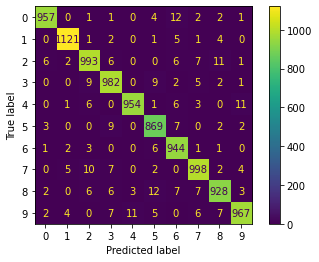

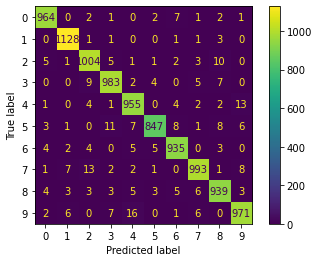

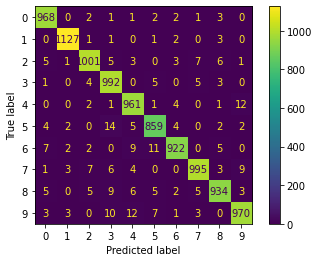

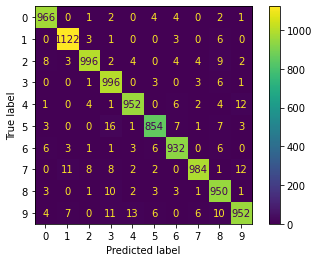

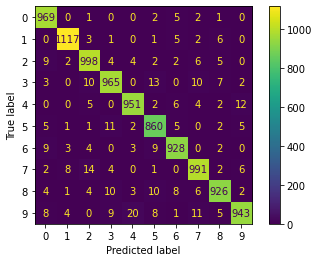

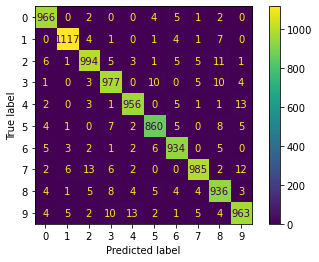

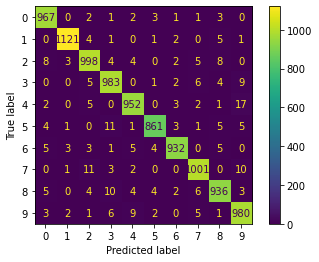

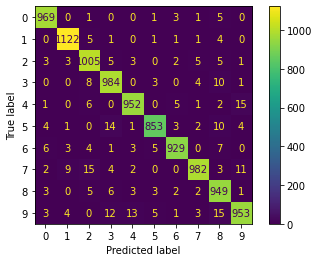

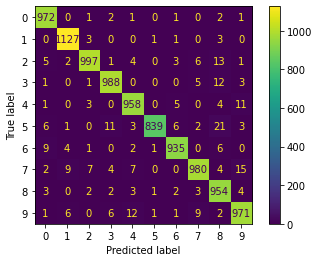

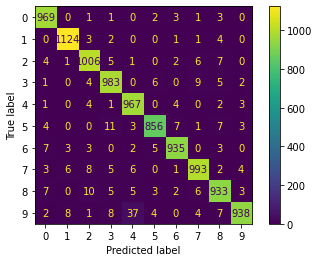

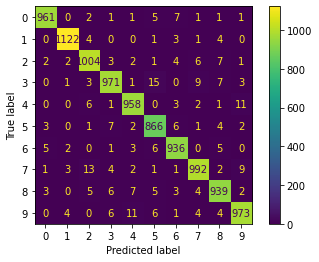

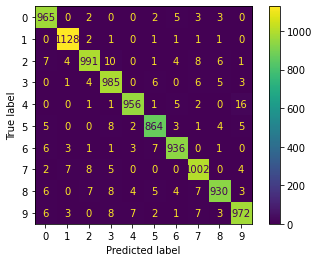

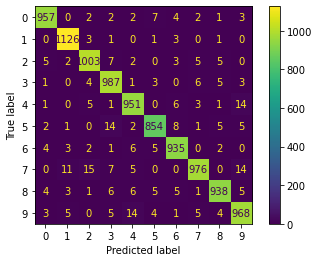

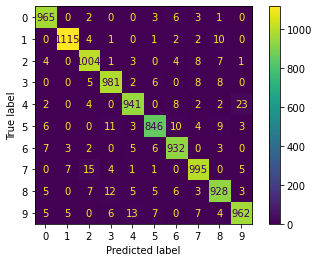

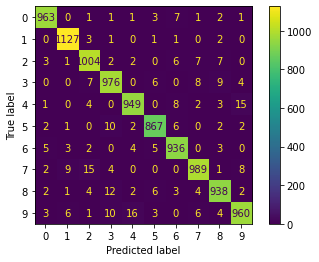

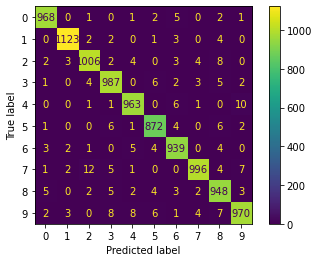

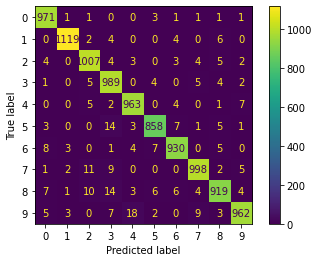

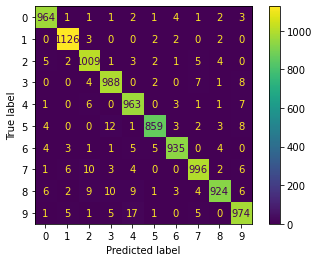

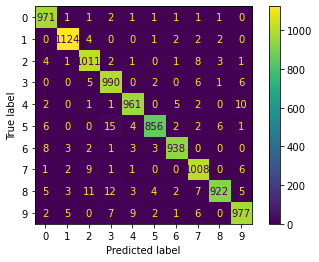

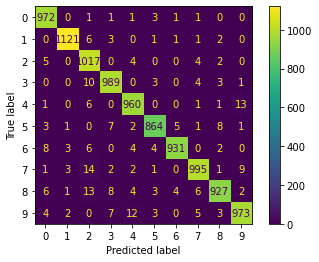

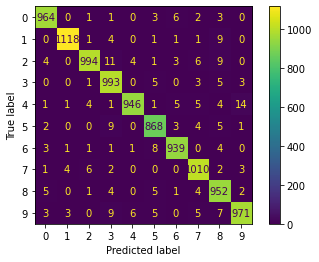

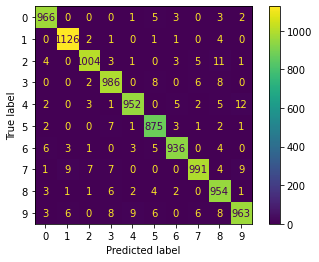

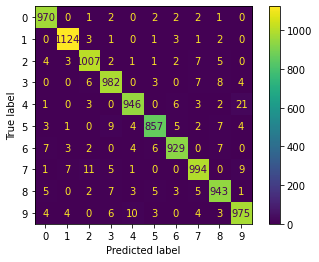

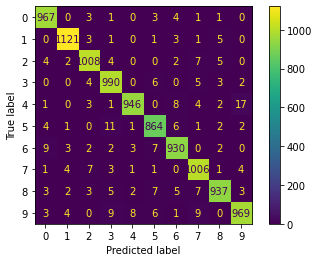

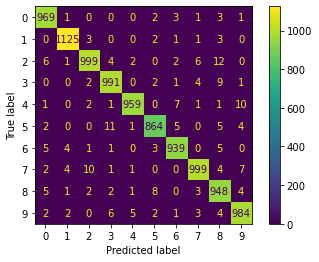

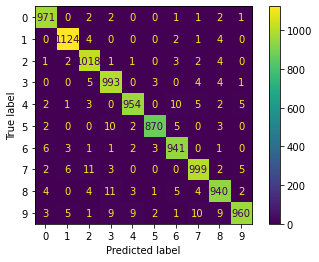

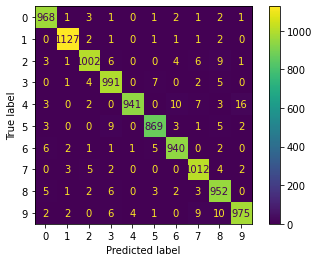

In [61]:
neurons = [(50, 50), (50, 100), (100, 50)]
activations = ['tanh', 'sigmoid', 'relu']
for units in neurons:
    for act1 in activations:
        for act2 in activations:
            print(f"Hidden Layer 1: {units[0]} neurons, activation={act1}")
            print(f"Hidden Layer 2: {units[1]} neurons, activation={act2}")
            model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(units[0], activation=act1),
            tf.keras.layers.Dense(units[1], activation=act2),
            tf.keras.layers.Dense(10)
            ])
            model.compile(
                optimizer=tf.keras.optimizers.Adam(0.001),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
            )
            hist = model.fit(
                ds_train,
                epochs=10,
                validation_data=ds_test,
                verbose=0
            )
            res_df.loc[len(res_df)] = [units[0], act1, units[1], act2, hist.history['val_sparse_categorical_accuracy'][-1]]
            print(f"Accuracy: {hist.history['val_sparse_categorical_accuracy'][-1]}")

            test_predictions = model.predict(x_test)
            cm = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
            print("Confusion matrix:")
            print(cm)
            print()

            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
            disp.plot()
            plt.savefig(f"{units[0]}_{act1}_{units[1]}_{act2}.png", bbox_inches='tight')
            # plt.show()
            

In [62]:
res_df.to_csv("ann_results_unsorted.csv", index=None)
res_df

,No. of neurons(HL1),Activation(HL1),No. of neurons(HL2),Activation(HL2),Accuracy
0,50,tanh,50,tanh,0.9713
1,50,tanh,50,sigmoid,0.9719
2,50,tanh,50,relu,0.9729
3,50,sigmoid,50,tanh,0.9704
4,50,sigmoid,50,sigmoid,0.9648
5,50,sigmoid,50,relu,0.9688
6,50,relu,50,tanh,0.9731
7,50,relu,50,sigmoid,0.9698
8,50,relu,50,relu,0.9721
9,50,tanh,100,tanh,0.9704


In [63]:
res_df.sort_values(by=['Accuracy'], ascending=False, inplace=True)
res_df.to_csv("ann_results.csv", index=None)
res_df

,No. of neurons(HL1),Activation(HL1),No. of neurons(HL2),Activation(HL2),Accuracy
26,100,relu,50,relu,0.9777
24,100,relu,50,tanh,0.9777
15,50,relu,100,tanh,0.9772
25,100,relu,50,sigmoid,0.9770
18,100,tanh,50,tanh,0.9758
20,100,tanh,50,relu,0.9755
21,100,sigmoid,50,tanh,0.9753
19,100,tanh,50,sigmoid,0.9749
23,100,sigmoid,50,relu,0.9738
17,50,relu,100,relu,0.9738


In [65]:
res_df

,No. of neurons(HL1),Activation(HL1),No. of neurons(HL2),Activation(HL2),Accuracy
26,100,relu,50,relu,0.9777
24,100,relu,50,tanh,0.9777
15,50,relu,100,tanh,0.9772
25,100,relu,50,sigmoid,0.9770
18,100,tanh,50,tanh,0.9758
20,100,tanh,50,relu,0.9755
21,100,sigmoid,50,tanh,0.9753
19,100,tanh,50,sigmoid,0.9749
23,100,sigmoid,50,relu,0.9738
17,50,relu,100,relu,0.9738
